Evaluate maximum possible segmentation performance for connection model

In [1]:
import os
import sys
code_dir = os.getcwd()
sys.path.insert(0, code_dir)

from connection_data_preparation import evaluateConnMap

CONN_DATA_ROOT="__EJMAP_ROOT_DIR__/data/conn_data/"
CONN_RESULT_DIR="__EJMAP_ROOT_DIR__/results/conn_results/"
CYL_DATA_ROOT="__EJMAP_ROOT_DIR__/data/cyl_data/"
EJC_DATA_ROOT="__EJMAP_ROOT_DIR__/data/ejc_data/"

metrics_dict = evaluateConnMap(32, 
                    61, 
                    CONN_RESULT_DIR,
                    CONN_DATA_ROOT,
                    EJC_DATA_ROOT,
                    CYL_DATA_ROOT,
                    num_workers = 12)

metrics_dict

/home/mlissoni/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


0 269 689 5.614497184753418
3 54 125 2.771432399749756
5 9 16 2.2152559757232666
8 40 91 2.4995951652526855
10 28 57 2.228447437286377
12 59 145 3.0094382762908936
13 42 75 3.190685749053955
14 12 16 2.485361099243164
15 8 12 2.251659393310547
17 40 98 3.1767799854278564
22 24 39 3.0872182846069336
23 6 9 2.4889590740203857
24 22 56 2.8777081966400146
25 3 13 2.4389214515686035
26 5 11 2.054456949234009
28 9 23 2.2999982833862305
29 4 10 2.0435616970062256
30 6 8 2.06854510307312
31 28 104 2.324284791946411
32 3 10 2.119419574737549
33 7 12 2.2759461402893066
34 24 58 2.771719217300415
35 7 11 2.940450429916382
36 6 7 2.6061346530914307
37 7 11 2.463160276412964
38 6 7 2.2443244457244873
39 4 7 2.7023913860321045
40 4 12 2.5256400108337402
41 6 9 2.6595849990844727
43 0 4 11.505443096160889
44 6 11 2.4240949153900146
45 5 8 2.1864542961120605
46 7 15 2.317075252532959
47 3 11 2.4941022396087646
48 3 8 2.2276952266693115
49 4 10 2.0338075160980225
50 9 13 2.3044497966766357
51 4 13 2.09

{'Accuracy': 0.9991805127651088,
 'F1_Score': 0.966556534371886,
 'IoU': 0.9352776097765785,
 'Precision': 1.0,
 'Recall': 0.9352776097765785,
 'conn_Accuracy': 0.9917898193760263,
 'conn_F1_Score': 0.9341142020497804,
 'conn_IoU': 0.8763736263736264,
 'conn_Precision': 1.0,
 'conn_Recall': 0.8763736263736264,
 'test_Accuracy': 0.998224534310759,
 'test_F1_Score': 0.9346546342351411,
 'test_IoU': 0.877325479858929,
 'test_Precision': 1.0,
 'test_Recall': 0.877325479858929,
 'conn_test_Accuracy': 0.9808394160583942,
 'conn_test_F1_Score': 0.8346456692913385,
 'conn_test_IoU': 0.7162162162162162,
 'conn_test_Precision': 1.0,
 'conn_test_Recall': 0.7162162162162162}

Segmentation model hyperparameter tuning diagrams

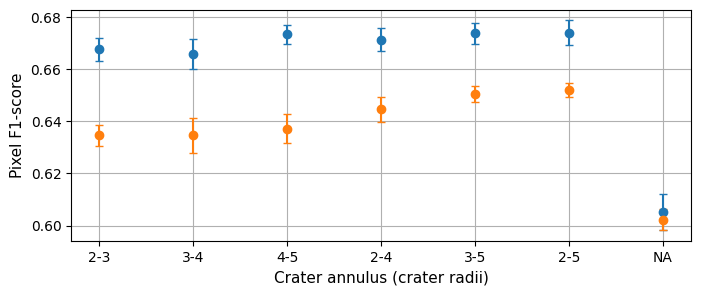

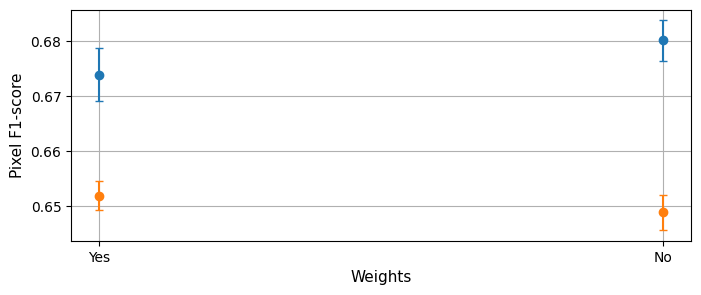

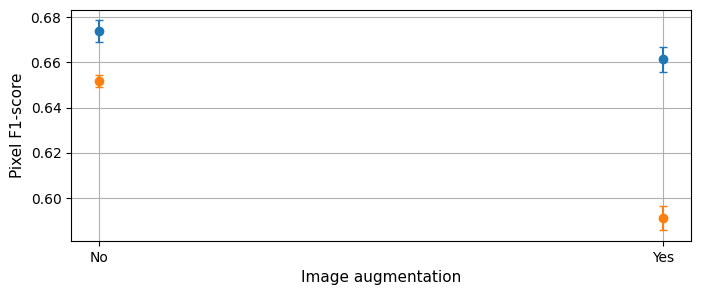

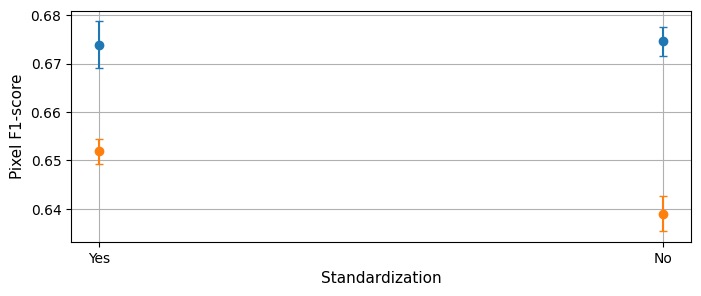

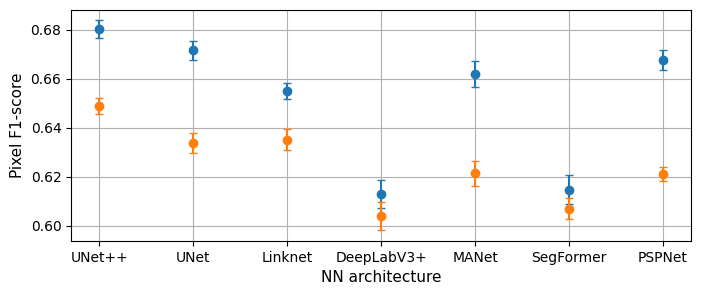

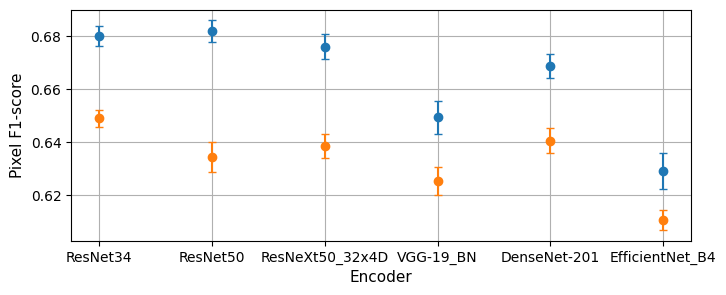

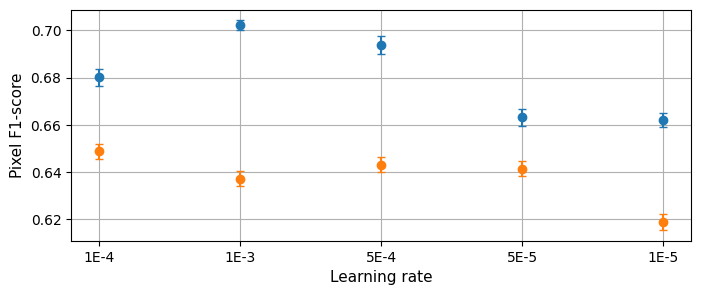

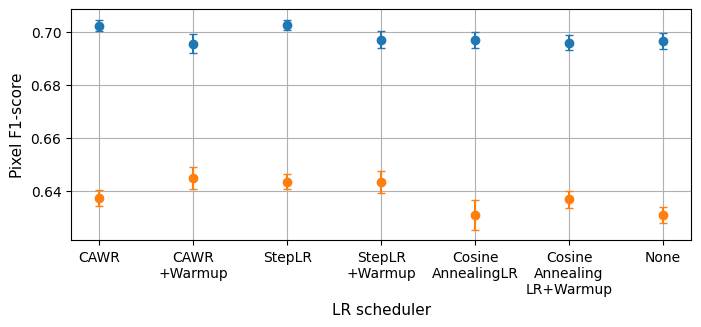

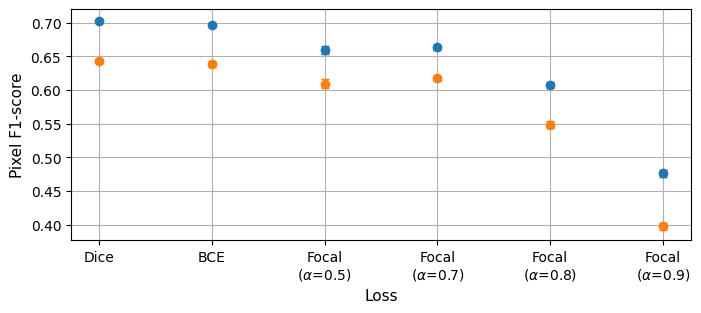

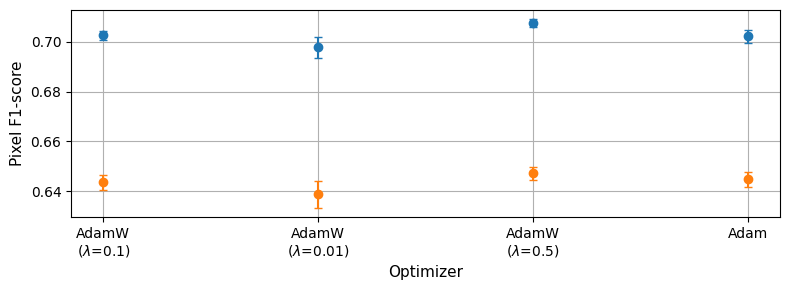

In [2]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

figwidth = 8

options_dict = {'Crater annulus (crater radii)': # Hyperparameter 
                                      {'Versions': [154, 155, 156, 157, 158, 159, 160], # Versions where the hyperparameter was modified
                                      'Values': ['2-3', '3-4', '4-5', '2-4', '3-5', '2-5', 'NA']}, # Values of the hyperparameter
                'Weights': {'Versions': [159, 161],
                            'Values': ['Yes', 'No']},
                'Image augmentation': {'Versions': [159, 162],
                                      'Values': ['No', 'Yes']},
                'Standardization': {'Versions': [159, 163],
                                      'Values': ['Yes', 'No']},
                'NN architecture': {'Versions': [161, 164, 165, 166, 167, 168, 169],
                                    'Values': ['UNet++', 'UNet', 'Linknet', 'DeepLabV3+', 'MANet', 'SegFormer', 'PSPNet']},
                'Encoder': {'Versions': [161, 170, 171, 172, 173, 174],
                            'Values': ['ResNet34', 'ResNet50', 'ResNeXt50_32x4D', 'VGG-19_BN', 'DenseNet-201', 'EfficientNet_B4']},
                'Learning rate': {'Versions': [161, 193, 176, 177, 178],
                                  'Values': ['1E-4', '1E-3', '5E-4', '5E-5', '1E-5']},
                'LR scheduler': {'Versions': [193, 179, 180, 181, 182, 183, 184],
                                 'Values': ['CAWR', 'CAWR\n+Warmup', 'StepLR', 'StepLR\n+Warmup', 'Cosine\nAnnealingLR', 'Cosine\nAnnealing\nLR+Warmup', 'None']},
                'Loss': {'Versions': [180, 194, 195, 196, 197, 198],
                         'Values': ['Dice', 'BCE', 'Focal\n'r'($\alpha$=0.5)', 'Focal\n'r'($\alpha$=0.7)','Focal\n'r'($\alpha$=0.8)','Focal\n'r'($\alpha$=0.9)']},
                'Optimizer': {'Versions': [180, 199, 200, 201],
                              'Values': ['AdamW\n'r'($\lambda$=0.1)', 'AdamW\n'r'($\lambda$=0.01)', 'AdamW\n'r'($\lambda$=0.5)', 'Adam']}
               }

# Choose metric (pixel-wise)
metrics = ['F1_Score']#, 'Precision', 'Recall', 'IoU']
ejc_result_dir="__EJMAP_ROOT_DIR__/results/ejc_results/"

all_metrics = np.append(metrics, np.char.add('test_', metrics))

I = 0
for hparam, hparam_dict in options_dict.items():

    stat_versions = hparam_dict['Versions']
    hparam_values = hparam_dict['Values']    

    means = pd.DataFrame(columns = all_metrics, index=[])
    stds = pd.DataFrame(columns = all_metrics, index=[])
    
    for i in range(0,len(stat_versions)):
        stat_version = stat_versions[i]
        hparam_value = hparam_values[i]
        
        stat_metrics = pd.read_csv(os.path.join(ejc_result_dir, 'version_'+str(stat_version), 'eval_metrics.csv'))
        metrics_mean = stat_metrics.mean(axis=0, skipna=True, numeric_only=True)
        metrics_std = stat_metrics.std(axis=0, skipna=True, ddof=1, numeric_only=True)
    
        means.loc[stat_version, all_metrics] = metrics_mean.loc[all_metrics].values
        means.loc[stat_version, hparam] = hparam_value
        stds.loc[stat_version, all_metrics] = metrics_std.loc[all_metrics].values
        stds.loc[stat_version, 'iterations'] = len(stat_metrics)
        stds.loc[stat_version, hparam] = hparam_value
    
    for metric in metrics:
    
        fig, ax = plt.subplots(1,1, figsize=(figwidth,3))
        ax.errorbar(np.arange(len(stat_versions)), means.loc[:, 'test_'+metric], yerr=stds.loc[:, 'test_'+metric]/np.sqrt(stds['iterations']), fmt="o", capsize=3, label="Test")
        ax.errorbar(np.arange(len(stat_versions)), means.loc[:, metric], yerr=stds.loc[:, metric]/np.sqrt(stds['iterations']), fmt="o", capsize=3, label="TVT")
        ax.set_xticks(np.arange(len(stat_versions)), hparam_values)
    
        ax.set_ylabel('Pixel F1-score', fontsize=11)
        
        ax.set_xlabel(hparam, fontsize=11)
        ax.grid()
        #ax.legend(fontsize=13)

    I+=1

plt.tight_layout()
plt.show()

Performance of the different TV-Test splits

F1 score
0.5988374303828949 0.008900889397956519 0.5127586242846973 0.7073718579197442 0.7073718579197442
0.7554288058301207 0.005043456534468451 0.7149396641093594 0.8047468064398406 0.780700507847146

0.6298423571003255 0.0014994543573132073 0.6182599018658225 0.647089742407967 0.647089742407967
0.8767049225867124 0.0018546470833461718 0.8563670768460618 0.8909043819906379 0.8862085101605517

Precision
0.5966774866739802 0.010777541253698541 0.5385903209952962 0.7034549591124042 0.7034549591124042
0.8357702138532614 0.008775156771356952 0.7763126261175105 0.9210539275163688 0.8766440550226378

0.6005603886315382 0.002637074379076088 0.5822957318041526 0.6176728279862163 0.6117922653334676
0.9099273675357681 0.0022031557326861934 0.8888345576810934 0.9260405671965117 0.9178064276501617

Recall
0.6093891007172391 0.012498035288197777 0.48087342995169086 0.7140543980419921 0.7140543980419921
0.6915132831032795 0.008199703188303714 0.606081081081081 0.7378378378378379 0.7040540540540541


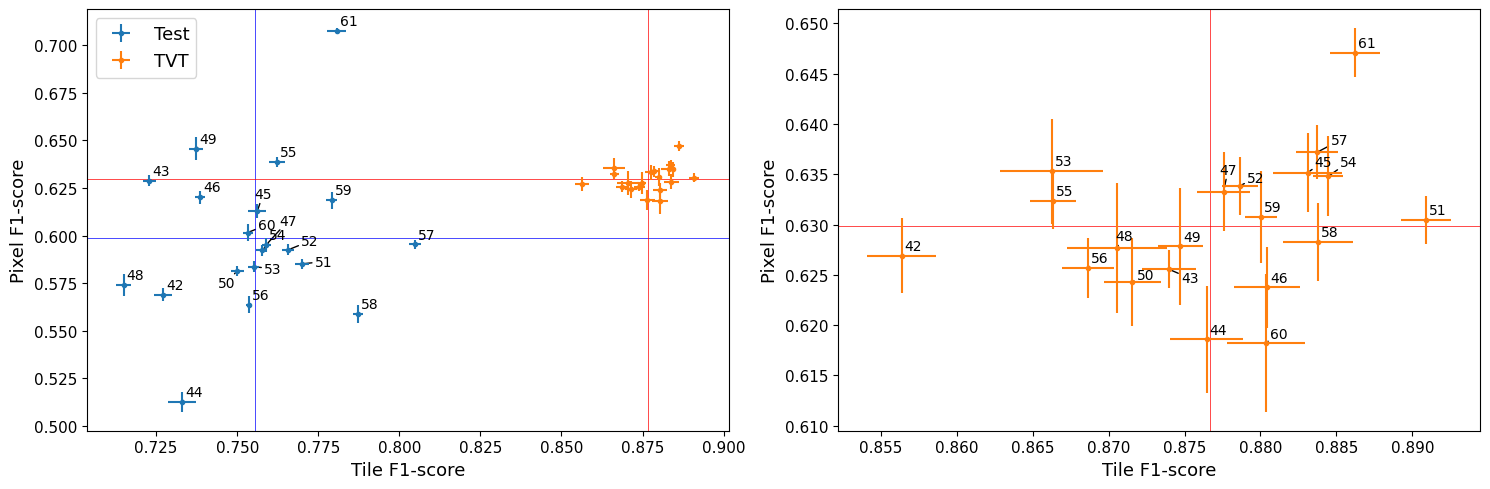

            Recall  test_Recall
test-set                       
61        0.693694     0.714054


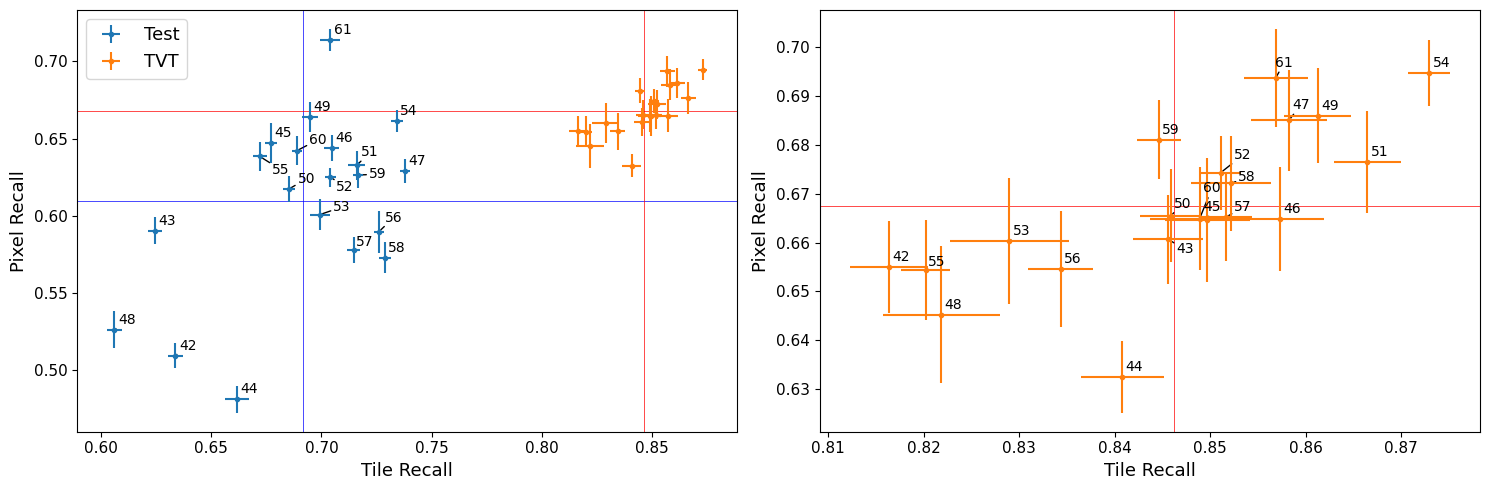

          Precision  test_Precision
test-set                           
42         0.604222        0.648874
43         0.597285        0.678082
46         0.592310        0.602206
48         0.617673        0.639982
49         0.582296        0.632498
55         0.616222        0.642669
57         0.614135        0.617931
59         0.590158        0.614268
61         0.611792        0.703455


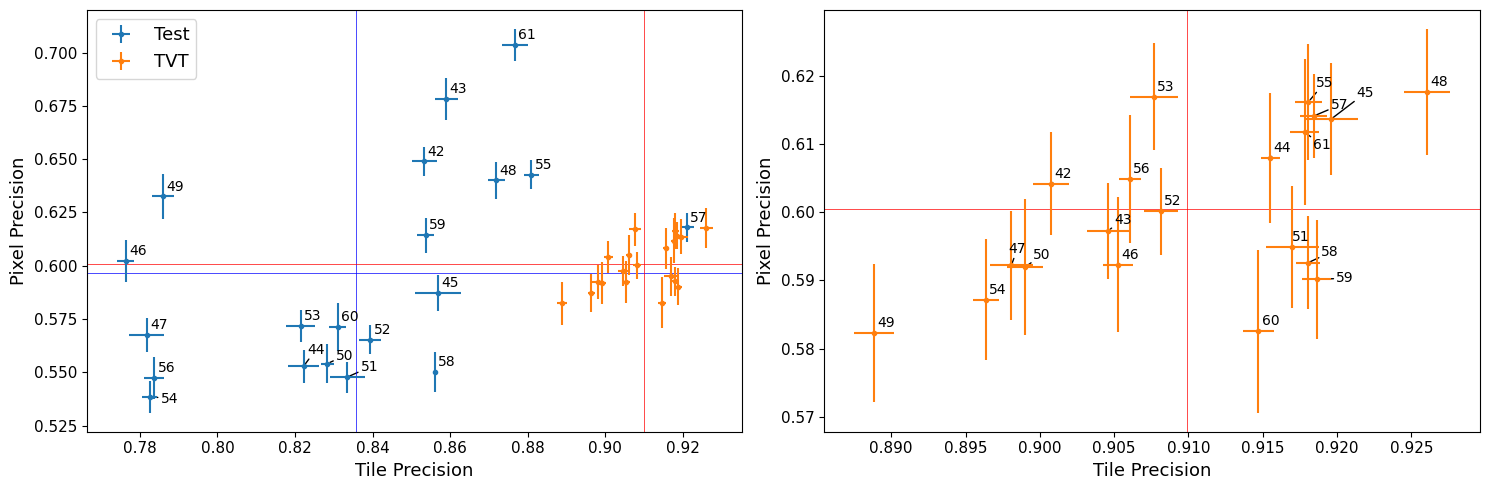

               IoU  test_IoU
test-set                    
43        0.455167  0.458677
49        0.458027  0.477334
55        0.462435  0.469216
61        0.478385  0.547279


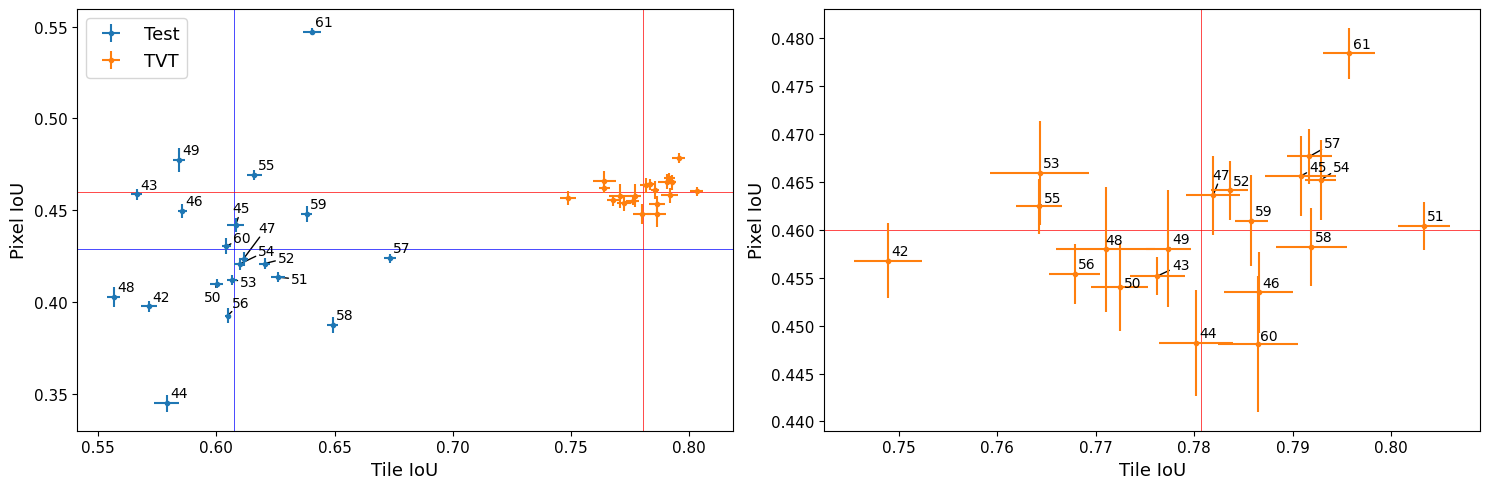

In [2]:
# TV-test split

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cairosvg
from adjustText import adjust_text

save = False # Saving via code is necessary for a good representation of the error bars, otherwise they are slightly off

conn_results_dir = "__EJMAP_ROOT_DIR__/results/conn_results/"
ejc_results_dir = "__EJMAP_ROOT_DIR__/results/ejc_results/"

# Directory to save the graphs.
fig_dir = "__EJMAP_ROOT_DIR__/images/"

conn_version = 34
ejc_version = 202 #152 #109 #152 #23 #106
no_labels = False
no_points = False

# If data for another TV-Test split needs to be added or changed...
test_set_change = 61# None#61
version_change = 200#None#200

conn_test_metrics = pd.read_csv(os.path.join(conn_results_dir,'version_'+str(conn_version),'test_metrics.csv')).groupby('test-set').mean(numeric_only=True)
ejc_test_metrics = pd.read_csv(os.path.join(ejc_results_dir,'version_'+str(ejc_version),'test_metrics.csv')).groupby('test-set').mean(numeric_only=True)
ejc_eval_metrics = pd.read_csv(os.path.join(ejc_results_dir,'version_'+str(ejc_version),'eval_metrics.csv')).groupby('test-set').mean(numeric_only=True)

ejc_test_metrics_std = pd.read_csv(os.path.join(ejc_results_dir,'version_'+str(ejc_version),'test_metrics.csv')).groupby('test-set').std(ddof=1, numeric_only=True)
ejc_eval_metrics_std = pd.read_csv(os.path.join(ejc_results_dir,'version_'+str(ejc_version),'eval_metrics.csv')).groupby('test-set').std(ddof=1, numeric_only=True)
ejc_test_metrics_count = pd.read_csv(os.path.join(ejc_results_dir,'version_'+str(ejc_version),'test_metrics.csv')).groupby('test-set').count()
ejc_eval_metrics_count = pd.read_csv(os.path.join(ejc_results_dir,'version_'+str(ejc_version),'eval_metrics.csv')).groupby('test-set').count()

if test_set_change is not None and version_change is not None:

    ejc_test_change = pd.read_csv(os.path.join(ejc_results_dir,'version_'+str(version_change),'test_metrics.csv')).groupby('test-set').mean(numeric_only=True).loc[test_set_change,:]
    ejc_eval_change = pd.read_csv(os.path.join(ejc_results_dir,'version_'+str(version_change),'eval_metrics.csv')).groupby('test-set').mean(numeric_only=True).loc[test_set_change,:]
    ejc_test_change_std = pd.read_csv(os.path.join(ejc_results_dir,'version_'+str(version_change),'test_metrics.csv')).groupby('test-set').std(ddof=1, numeric_only=True).loc[test_set_change,:]
    ejc_eval_change_std = pd.read_csv(os.path.join(ejc_results_dir,'version_'+str(version_change),'eval_metrics.csv')).groupby('test-set').std(ddof=1, numeric_only=True).loc[test_set_change,:]
    ejc_test_change_count = pd.read_csv(os.path.join(ejc_results_dir,'version_'+str(version_change),'test_metrics.csv')).groupby('test-set').count().loc[test_set_change,:]
    ejc_eval_change_count = pd.read_csv(os.path.join(ejc_results_dir,'version_'+str(version_change),'eval_metrics.csv')).groupby('test-set').count().loc[test_set_change,:]
    
    ejc_test_metrics.loc[test_set_change,:] = ejc_test_change.loc[ejc_test_metrics.columns.values].values
    ejc_eval_metrics.loc[test_set_change,:] = ejc_eval_change.loc[ejc_eval_metrics.columns.values].values
    ejc_test_metrics_std.loc[test_set_change,:] = ejc_test_change_std.loc[ejc_test_metrics_std.columns.values].values
    ejc_eval_metrics_std.loc[test_set_change,:] = ejc_eval_change_std.loc[ejc_eval_metrics_std.columns.values].values
    ejc_test_metrics_count.loc[test_set_change,:] = ejc_test_change_count.loc[ejc_test_metrics_count.columns.values].values
    ejc_eval_metrics_count.loc[test_set_change,:] = ejc_eval_change_count.loc[ejc_eval_metrics_count.columns.values].values

test_sets = ejc_eval_metrics.index.values

# Print metric statistics

print('F1 score')
print(np.mean(ejc_eval_metrics['test_F1_Score']),  
      np.std(ejc_eval_metrics['test_F1_Score'], ddof=1)/np.sqrt(len(ejc_eval_metrics)),
      np.amin(ejc_eval_metrics['test_F1_Score']),
     np.amax(ejc_eval_metrics['test_F1_Score']),
     ejc_eval_metrics['test_F1_Score'].iloc[np.argmax(ejc_eval_metrics['test_F1_Score'])])
print(np.mean(ejc_eval_metrics['conn_test_F1_Score']),  
      np.std(ejc_eval_metrics['conn_test_F1_Score'], ddof=1)/np.sqrt(len(ejc_eval_metrics)),
      np.amin(ejc_eval_metrics['conn_test_F1_Score']),
     np.amax(ejc_eval_metrics['conn_test_F1_Score']),
     ejc_eval_metrics['conn_test_F1_Score'].iloc[np.argmax(ejc_eval_metrics['test_F1_Score'])])
print('')
print(np.mean(ejc_eval_metrics['F1_Score']),  
      np.std(ejc_eval_metrics['F1_Score'], ddof=1)/np.sqrt(len(ejc_eval_metrics)),
      np.amin(ejc_eval_metrics['F1_Score']),
     np.amax(ejc_eval_metrics['F1_Score']),
     ejc_eval_metrics['F1_Score'].iloc[np.argmax(ejc_eval_metrics['test_F1_Score'])])
print(np.mean(ejc_eval_metrics['conn_F1_Score']),  
      np.std(ejc_eval_metrics['conn_F1_Score'], ddof=1)/np.sqrt(len(ejc_eval_metrics)),
      np.amin(ejc_eval_metrics['conn_F1_Score']),
     np.amax(ejc_eval_metrics['conn_F1_Score']),
     ejc_eval_metrics['conn_F1_Score'].iloc[np.argmax(ejc_eval_metrics['test_F1_Score'])])
print('')

print('Precision')
print(np.mean(ejc_eval_metrics['test_Precision']),  
      np.std(ejc_eval_metrics['test_Precision'], ddof=1)/np.sqrt(len(ejc_eval_metrics)),
      np.amin(ejc_eval_metrics['test_Precision']),
     np.amax(ejc_eval_metrics['test_Precision']),
     ejc_eval_metrics['test_Precision'].iloc[np.argmax(ejc_eval_metrics['test_Precision'])])
print(np.mean(ejc_eval_metrics['conn_test_Precision']),  
      np.std(ejc_eval_metrics['conn_test_Precision'], ddof=1)/np.sqrt(len(ejc_eval_metrics)),
      np.amin(ejc_eval_metrics['conn_test_Precision']),
     np.amax(ejc_eval_metrics['conn_test_Precision']),
     ejc_eval_metrics['conn_test_Precision'].iloc[np.argmax(ejc_eval_metrics['test_Precision'])])
print('')
print(np.mean(ejc_eval_metrics['Precision']),  
      np.std(ejc_eval_metrics['Precision'], ddof=1)/np.sqrt(len(ejc_eval_metrics)),
      np.amin(ejc_eval_metrics['Precision']),
     np.amax(ejc_eval_metrics['Precision']),
     ejc_eval_metrics['Precision'].iloc[np.argmax(ejc_eval_metrics['test_Precision'])])
print(np.mean(ejc_eval_metrics['conn_Precision']),  
      np.std(ejc_eval_metrics['conn_Precision'], ddof=1)/np.sqrt(len(ejc_eval_metrics)),
      np.amin(ejc_eval_metrics['conn_Precision']),
     np.amax(ejc_eval_metrics['conn_Precision']),
     ejc_eval_metrics['conn_Precision'].iloc[np.argmax(ejc_eval_metrics['test_Precision'])])
print('')

print('Recall')
print(np.mean(ejc_eval_metrics['test_Recall']),  
      np.std(ejc_eval_metrics['test_Recall'], ddof=1)/np.sqrt(len(ejc_eval_metrics)),
      np.amin(ejc_eval_metrics['test_Recall']),
     np.amax(ejc_eval_metrics['test_Recall']),
     ejc_eval_metrics['test_Recall'].iloc[np.argmax(ejc_eval_metrics['test_Recall'])])
print(np.mean(ejc_eval_metrics['conn_test_Recall']),  
      np.std(ejc_eval_metrics['conn_test_Recall'], ddof=1)/np.sqrt(len(ejc_eval_metrics)),
      np.amin(ejc_eval_metrics['conn_test_Recall']),
     np.amax(ejc_eval_metrics['conn_test_Recall']),
     ejc_eval_metrics['conn_test_Recall'].iloc[np.argmax(ejc_eval_metrics['test_Recall'])])
print('')
print(np.mean(ejc_eval_metrics['Recall']),  
      np.std(ejc_eval_metrics['Recall'], ddof=1)/np.sqrt(len(ejc_eval_metrics)),
      np.amin(ejc_eval_metrics['Recall']),
     np.amax(ejc_eval_metrics['Recall']),
     ejc_eval_metrics['Recall'].iloc[np.argmax(ejc_eval_metrics['test_Recall'])])
print(np.mean(ejc_eval_metrics['conn_Recall']),  
      np.std(ejc_eval_metrics['conn_Recall'], ddof=1)/np.sqrt(len(ejc_eval_metrics)),
      np.amin(ejc_eval_metrics['conn_Recall']),
     np.amax(ejc_eval_metrics['conn_Recall']),
     ejc_eval_metrics['conn_Recall'].iloc[np.argmax(ejc_eval_metrics['test_Recall'])])
print('')

if no_points:
    test_color = (1.,1.,1.,0)
    test_mean_color = (1.,1.,1.,0)
    tt_color = (1.,1.,1.,0)
    tt_mean_color = (1.,1.,1.,0)
else:
    test_color = 'tab:blue'
    test_mean_color = 'blue'
    tt_color = 'tab:orange'
    tt_mean_color = 'red'

if no_points and not(no_labels):
    fig_suffix = '_labels'
elif no_labels and not(no_points):
    fig_suffix = '_points'
else:
    fig_suffix = ''

# Plot metrics

metric_dict = {'F1_Score': 'F1-score',
               'Recall': 'Recall',
               'Precision': 'Precision',
               'IoU': 'IoU'}

for metric in list(metric_dict.keys()):

    label_metric = metric_dict[metric]

    print(ejc_eval_metrics.loc[ejc_eval_metrics['test_'+metric] - ejc_eval_metrics[metric] > 0,[metric, 'test_'+metric]])

    tt_x = ejc_eval_metrics['conn_'+metric]
    tt_y = ejc_eval_metrics[metric]
    tt_xerr = ejc_eval_metrics_std['conn_'+metric]/np.sqrt(ejc_eval_metrics_count['conn_'+metric])
    tt_yerr = ejc_eval_metrics_std[metric]/np.sqrt(ejc_eval_metrics_count[metric])

    test_x = ejc_eval_metrics['conn_test_'+metric]
    test_y = ejc_eval_metrics['test_'+metric]
    test_xerr = ejc_eval_metrics_std['conn_test_'+metric]/np.sqrt(ejc_eval_metrics_count['conn_test_'+metric])
    test_yerr = ejc_eval_metrics_std['test_'+metric]/np.sqrt(ejc_eval_metrics_count['test_'+metric])

    fig, ax = plt.subplots(1,2, figsize=(15,5))
    ax[0].axvline(np.mean(test_x), color=test_mean_color, linewidth=0.5)
    ax[0].axhline(np.mean(test_y), color=test_mean_color, linewidth=0.5)
    ax[0].axvline(np.mean(tt_x), color=tt_mean_color, linewidth=0.5)
    ax[0].axhline(np.mean(tt_y), color=tt_mean_color, linewidth=0.5)
    ax[0].errorbar(test_x, test_y, xerr = test_xerr, yerr = test_yerr, fmt='.', color=test_color, label = 'Test')
    ax[0].errorbar(tt_x, tt_y, xerr = tt_xerr, yerr = tt_yerr, fmt='.', color=tt_color, label = 'TVT')
    
    if not(no_labels):
        texts = [ax[0].text(test_x.loc[test_set], test_y.loc[test_set], str(test_set)) for test_set in test_sets]
        virtual_x = np.concatenate([np.append(np.linspace(test_x.loc[test_set] - test_xerr.loc[test_set], test_x.loc[test_set] + test_xerr.loc[test_set], 11), 
                                              np.repeat(test_x.loc[test_set], 11)) for test_set in test_sets])
        virtual_y = np.concatenate([np.append(np.repeat(test_y.loc[test_set], 11), 
                                              np.linspace(test_y.loc[test_set] - test_yerr.loc[test_set], test_y.loc[test_set] + test_yerr.loc[test_set], 11)) for test_set in test_sets])

        arrowprops=dict(arrowstyle='-', color='k') if not no_points else None
        
        adjust_text(texts, x = virtual_x, y = virtual_y, ax=ax[0], min_arrow_len = 2, arrowprops=arrowprops)
    
    ax[0].tick_params(labelsize=11)
    ax[0].tick_params(labelsize=11)
    ax[0].set_xlabel('Tile '+label_metric, fontsize=13)
    ax[0].set_ylabel('Pixel '+label_metric, fontsize=13)
    if not no_points:
        ax[0].legend(fontsize=13)
    
    ax[1].axvline(np.mean(tt_x), color=tt_mean_color, linewidth=0.5)
    ax[1].axhline(np.mean(tt_y), color=tt_mean_color, linewidth=0.5)
    ax[1].errorbar(tt_x, tt_y, xerr = tt_xerr, yerr = tt_yerr, fmt='.', color=tt_color, label = 'TVT')
    
    if not(no_labels):
        texts = [ax[1].text(tt_x.loc[test_set], tt_y.loc[test_set], str(test_set)) for test_set in test_sets]
        virtual_x = np.concatenate([np.append(np.linspace(tt_x.loc[test_set] - tt_xerr.loc[test_set], tt_x.loc[test_set] + tt_xerr.loc[test_set], 11), 
                                              np.repeat(tt_x.loc[test_set], 11)) for test_set in test_sets])
        virtual_y = np.concatenate([np.append(np.repeat(tt_y.loc[test_set], 11), 
                                              np.linspace(tt_y.loc[test_set] - tt_yerr.loc[test_set], tt_y.loc[test_set] + tt_yerr.loc[test_set], 11)) for test_set in test_sets])

        arrowprops=dict(arrowstyle='-', color='k') if not no_points else None
        adjust_text(texts, x = virtual_x, y = virtual_y, ax=ax[1], min_arrow_len = 2, arrowprops=arrowprops)
    
    ax[1].tick_params(labelsize=11)
    ax[1].tick_params(labelsize=11)
    ax[1].set_xlabel('Tile '+label_metric, fontsize=13)
    ax[1].set_ylabel('Pixel '+label_metric, fontsize=13)
    
    fig.tight_layout()
    plt.show()

    if save:
        fig.savefig('foo.svg', transparent=no_points)
        cairosvg.svg2png(url='foo.svg', write_to = os.path.join(fig_dir, metric+fig_suffix+'.png'))
        os.remove('foo.svg')


Smaller sets: how the performance changes if the TV set is smaller

[69 68 74 71 66 65 72 64 73 70 67]
0.6143995790585659 0.6225729031073025 0.6605418827685944 0.6797799057573684
0.6862046733404841 0.691456289880081 0.7168847006580576 0.7285390424990046


/home/mlissoni/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


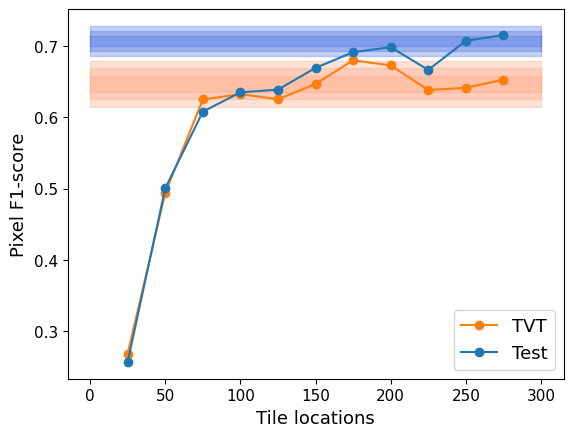

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ejc_results_dir = "__EJMAP_ROOT_DIR__/results/ejc_results/"

ejc_version = 203 #109

full_ejc_version = 200 #106
test_set = 61

# Smaller TV-Test splits
num_samples = {64: 25,
               65: 50,
               66: 75,
               67: 100,
               68: 125,
               69: 150,
               70: 175,
               71: 200,
               72: 225,
               73: 250,
               74: 275
               }

ejc_eval_metrics = pd.read_csv(os.path.join(ejc_results_dir,'version_'+str(ejc_version),'eval_metrics.csv'), index_col='test-set')
print(ejc_eval_metrics.index.values)

full_eval_metrics = pd.read_csv(os.path.join(ejc_results_dir,'version_'+str(full_ejc_version),'eval_metrics.csv'))
full_eval_metrics = full_eval_metrics.loc[full_eval_metrics['test-set']==test_set,:]


x = np.array([num_samples[key] for key in list(num_samples.keys())], dtype=int)
y = np.array([ejc_eval_metrics.loc[key, 'F1_Score'] for key in list(num_samples.keys())])
y = y[np.argsort(x)]
x = np.sort(x)

full_y = np.mean(full_eval_metrics['F1_Score'])
full_y_err = np.std(full_eval_metrics['F1_Score'], ddof=1)

print(full_y-3*full_y_err, np.amin(full_eval_metrics['F1_Score']), np.amax(full_eval_metrics['F1_Score']), full_y+3*full_y_err)

plt.figure()
plt.fill_between([0, 300], [full_y-3*full_y_err, full_y-3*full_y_err], [full_y+3*full_y_err, full_y+3*full_y_err], color='lightsalmon', alpha=0.3)
plt.fill_between([0, 300], [full_y-2*full_y_err, full_y-2*full_y_err], [full_y+2*full_y_err, full_y+2*full_y_err], color='lightsalmon', alpha=0.3)
plt.fill_between([0, 300], [full_y-full_y_err, full_y-full_y_err], [full_y+full_y_err, full_y+full_y_err], color='lightsalmon', alpha=0.3) 
plt.plot(x, y, '-o', color='tab:orange', label='TVT')


x = np.array([num_samples[key] for key in list(num_samples.keys())], dtype=int)
y = np.array([ejc_eval_metrics.loc[key, 'test_F1_Score'] for key in list(num_samples.keys())])
y = y[np.argsort(x)]
x = np.sort(x)

full_y = np.mean(full_eval_metrics['test_F1_Score'])
full_y_err = np.std(full_eval_metrics['test_F1_Score'], ddof=1)

print(full_y-3*full_y_err, np.amin(full_eval_metrics['test_F1_Score']), np.amax(full_eval_metrics['test_F1_Score']), full_y+3*full_y_err)

plt.fill_between([0, 300], [full_y-3*full_y_err, full_y-3*full_y_err], [full_y+3*full_y_err, full_y+3*full_y_err], color='royalblue', alpha=0.3)
plt.fill_between([0, 300], [full_y-2*full_y_err, full_y-2*full_y_err], [full_y+2*full_y_err, full_y+2*full_y_err], color='royalblue', alpha=0.3)
plt.fill_between([0, 300], [full_y-full_y_err, full_y-full_y_err], [full_y+full_y_err, full_y+full_y_err], color='royalblue', alpha=0.3) 
plt.plot(x, y, '-o', color='tab:blue', label='Test')

plt.legend(fontsize = 13)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
plt.xlabel('Tile locations', fontsize=13)
plt.ylabel('Pixel F1-score', fontsize=13)
plt.show()

Evaluate from masks: if the masks have already been saved, this cell can be used to perform an evaluation.
Useful if not all masks come from the same test set

In [1]:

import os
import numpy as np
import pandas as pd
import geopandas as gpd
import xarray as xr
import rasterio
import rioxarray
from shapely import Point, Polygon, MultiPolygon, LineString
import matplotlib.pyplot as plt


from pyproj import CRS, Transformer

import time
import gc
import glob

from sklearn.metrics import confusion_matrix

import scipy.ndimage as sni

from az_processing import *
from pos_processing import *
from planet_constants import Planet_Basemap, Planet_Properties

import sklearn.metrics as skm

filter_size = None # If set to a pixel window size, it returns the majority value (0 or 1) of the window.
                   # Used to perform the evaluation at a different scale

map_dir = "__EJMAP_ROOT_DIR__/results/output_masks/ejc-version-200_conn-version-32_test-set-61_x20/"

test_set_dict = {61: [0, 3, 8, 10, 12, 13, 17, 24, 31, 34,
                      5, 14, 15, 22, 23, 25, 26, 
                  28, 29, 30, 33, 35, 36, 37, 
                  38, 39, 40, 41, 43, 44, 45, 
                  47, 48, 49, 50, 51, 52, 54, 
                  55, 56, 57, 58, 59, 61, 62, 
                  63, 64, 65, 66, 67, 68, 69, 
                  70, 71, 72, 73, 74, 76, 77, 
                  78, 79, 80, 82, 83, 84, 85, 
                  86, 87, 88, 89, 90, 91, 92, 
                  93, 94, 95, 96, 97, 98, 99, 
                  100, 101, 102, 103, 104, 105, 
                  106, 107, 108, 109, 110, 111, 
                  112, 113, 114, 115, 116, 117, 
                  118, 32, 53, 119, 120, 121, 
                  122, 123, 124, 125, 46, 126, 
                  127, 128, 129, 130, 131, 132, 
                  133, 134, 135]}

conn_data_root="__EJMAP_ROOT_DIR__/data/conn_data/"
cyl_data_root="__EJMAP_ROOT_DIR__/data/cyl_data/"
ejc_data_root="__EJMAP_ROOT_DIR__/data/ejc_data/"

'''
map_dir = "__EJMAP_ROOT_DIR__/results/output_masks/ejc-version-11-14_conn-version-12-15_test-set-26-28"

test_set_dict = {28: [0, 3, 5, 8, 10, 12, 13, 
                   14, 15, 17, 22, 23, 24, 
                   25, 26, 28, 29, 30, 31, 
                   33, 34, 35, 37, 40, 41, 
                   44, 45, 48, 49, 50, 51, 
                   59, 61, 62, 67, 71, 72, 
                   78, 90, 98, 99, 112, 32, 46],
             26: [36, 38, 39, 43, 47, 52, 
                   54, 55, 56, 57, 58, 63, 
                   64, 65, 66, 68, 69, 70, 
                   73, 74, 76, 77, 79, 80, 
                   82, 83, 84, 85, 86, 87, 
                   88, 89, 91, 92, 93, 94, 
                   95, 96, 97, 100, 101, 102, 
                   103, 104, 105, 106, 107, 
                   108, 109, 110, 111, 113, 
                   114, 115, 116, 117, 118, 
                   53, 119, 120, 121, 122, 
                   123, 124, 125, 126, 127, 
                   128, 129, 130, 131, 132, 
                   133, 134, 135]}
'''
'''
map_dir = "__EJMAP_ROOT_DIR__/results/output_masks/ejc-version-14-15_conn-version-16-17_test-set-28-31_28forbig"

test_set_dict = {28: [0, 3, 8, 10, 12, 13, 17, 24, 31, 34],
             31: [5, 14, 15, 22, 23, 25, 26, 
                  28, 29, 30, 33, 35, 36, 37, 
                  38, 39, 40, 41, 43, 44, 45, 
                  47, 48, 49, 50, 51, 52, 54, 
                  55, 56, 57, 58, 59, 61, 62, 
                  63, 64, 65, 66, 67, 68, 69, 
                  70, 71, 72, 73, 74, 76, 77, 
                  78, 79, 80, 82, 83, 84, 85, 
                  86, 87, 88, 89, 90, 91, 92, 
                  93, 94, 95, 96, 97, 98, 99, 
                  100, 101, 102, 103, 104, 105, 
                  106, 107, 108, 109, 110, 111, 
                  112, 113, 114, 115, 116, 117, 
                  118, 32, 53, 119, 120, 121, 
                  122, 123, 124, 125, 46, 126, 
                  127, 128, 129, 130, 131, 132, 
                  133, 134, 135]}

'''
'''
map_dir = "__EJMAP_ROOT_DIR__/results/output_masks/ejc-version-6_conn-version-11_test-set-10"

test_set_dict = {10: [0, 3, 8, 10, 12, 13, 17, 24, 31, 34,
                      5, 14, 15, 22, 23, 25, 26, 
                  28, 29, 30, 33, 35, 36, 37, 
                  38, 39, 40, 41, 43, 44, 45, 
                  47, 48, 49, 50, 51, 52, 54, 
                  55, 56, 57, 58, 59, 61, 62, 
                  63, 64, 65, 66, 67, 68, 69, 
                  70, 71, 72, 73, 74, 76, 77, 
                  78, 79, 80, 82, 83, 84, 85, 
                  86, 87, 88, 89, 90, 91, 92, 
                  93, 94, 95, 96, 97, 98, 99, 
                  100, 101, 102, 103, 104, 105, 
                  106, 107, 108, 109, 110, 111, 
                  112, 113, 114, 115, 116, 117, 
                  118, 32, 53, 119, 120, 121, 
                  122, 123, 124, 125, 46, 126, 
                  127, 128, 129, 130, 131, 132, 
                  133, 134, 135]}

'''
'''
map_dir = "__EJMAP_ROOT_DIR__/results/output_masks/ejc-version-17-18_conn-version-18-19_test-set-38-39"

test_set_dict = {38: [0, 3, 5, 8, 10, 12, 13, 
                   14, 15, 17, 22, 23, 24, 
                   25, 26, 28, 29, 30, 31, 
                   33, 34, 35, 37, 40, 41, 
                   44, 45, 48, 49, 50, 51, 
                   59, 61, 62, 67, 71, 72, 
                   78, 90, 98, 99, 112, 32, 46],
             39: [36, 38, 39, 43, 47, 52, 
                   54, 55, 56, 57, 58, 63, 
                   64, 65, 66, 68, 69, 70, 
                   73, 74, 76, 77, 79, 80, 
                   82, 83, 84, 85, 86, 87, 
                   88, 89, 91, 92, 93, 94, 
                   95, 96, 97, 100, 101, 102, 
                   103, 104, 105, 106, 107, 
                   108, 109, 110, 111, 113, 
                   114, 115, 116, 117, 118, 
                   53, 119, 120, 121, 122, 
                   123, 124, 125, 126, 127, 
                   128, 129, 130, 131, 132, 
                   133, 134, 135]}
'''
'''
map_dir = "__EJMAP_ROOT_DIR__/results/output_masks/ejc-version-19_conn-version-20_test-set-37"

test_set_dict = {37: [0, 3, 8, 10, 12, 13, 17, 24, 31, 34,
                      5, 14, 15, 22, 23, 25, 26, 
                  28, 29, 30, 33, 35, 36, 37, 
                  38, 39, 40, 41, 43, 44, 45, 
                  47, 48, 49, 50, 51, 52, 54, 
                  55, 56, 57, 58, 59, 61, 62, 
                  63, 64, 65, 66, 67, 68, 69, 
                  70, 71, 72, 73, 74, 76, 77, 
                  78, 79, 80, 82, 83, 84, 85, 
                  86, 87, 88, 89, 90, 91, 92, 
                  93, 94, 95, 96, 97, 98, 99, 
                  100, 101, 102, 103, 104, 105, 
                  106, 107, 108, 109, 110, 111, 
                  112, 113, 114, 115, 116, 117, 
                  118, 32, 53, 119, 120, 121, 
                  122, 123, 124, 125, 46, 126, 
                  127, 128, 129, 130, 131, 132, 
                  133, 134, 135]}
'''
'''
map_dir = "__EJMAP_ROOT_DIR__/results/output_masks/ejc-version-105_conn-version-25_test-set-62-63"


test_set_dict = {62: [0, 3, 5, 8, 10, 12, 13, 14, 
               15, 17, 22, 23, 24, 25, 26, 
               28, 29, 30, 31, 33, 34, 35, 
               37, 39, 40, 41, 44, 45, 47, 
               48, 49, 50, 51, 59, 61, 62, 
               67, 71, 72, 78, 90, 98, 99, 
               112, 32, 46],
               63: [36, 38, 43, 52, 54, 55, 56, 
                 57, 58, 63, 64, 65, 66, 68, 
                 69, 70, 73, 74, 76, 77, 79, 
                 80, 82, 83, 84, 85, 86, 87, 
                 88, 89, 91, 92, 93, 94, 95, 
                 96, 97, 100, 101, 102, 103, 
                 104, 105, 106, 107, 108, 109, 
                 110, 111, 113, 114, 115, 116, 
                 117, 118, 53, 119, 120, 121, 
                 122, 123, 124, 125, 126, 127, 
                 128, 129, 130, 131, 132, 133, 
                 134, 135]}
'''
'''
#map_dir = "__EJMAP_ROOT_DIR__/results/output_masks/ejc-version-106_conn-version-23_test-set-49_x10"
map_dir = "__EJMAP_ROOT_DIR__/results/output_masks/ejc-version-64_conn-version-23_test-set-49"

test_set_dict = {49: [0, 3, 8, 10, 12, 13, 17, 24, 31, 34,
                      5, 14, 15, 22, 23, 25, 26, 
                  28, 29, 30, 33, 35, 36, 37, 
                  38, 39, 40, 41, 43, 44, 45, 
                  47, 48, 49, 50, 51, 52, 54, 
                  55, 56, 57, 58, 59, 61, 62, 
                  63, 64, 65, 66, 67, 68, 69, 
                  70, 71, 72, 73, 74, 76, 77, 
                  78, 79, 80, 82, 83, 84, 85, 
                  86, 87, 88, 89, 90, 91, 92, 
                  93, 94, 95, 96, 97, 98, 99, 
                  100, 101, 102, 103, 104, 105, 
                  106, 107, 108, 109, 110, 111, 
                  112, 113, 114, 115, 116, 117, 
                  118, 32, 53, 119, 120, 121, 
                  122, 123, 124, 125, 46, 126, 
                  127, 128, 129, 130, 131, 132, 
                  133, 134, 135]}
'''

'''
map_dir = "__EJMAP_ROOT_DIR__/results/output_masks/ejc-version-152_conn-version-29_test-set-77_x20/"

test_set_dict = {77: [0, 3, 8, 10, 12, 13, 17, 24, 31, 34,
                      5, 14, 15, 22, 23, 25, 26, 
                  28, 29, 30, 33, 35, 36, 37, 
                  38, 39, 40, 41, 43, 44, 45, 
                  47, 48, 49, 50, 51, 52, 54, 
                  55, 56, 57, 58, 59, 61, 62, 
                  63, 64, 65, 66, 67, 68, 69, 
                  70, 71, 72, 73, 74, 76, 77, 
                  78, 79, 80, 82, 83, 84, 85, 
                  86, 87, 88, 89, 90, 91, 92, 
                  93, 94, 95, 96, 97, 98, 99, 
                  100, 101, 102, 103, 104, 105, 
                  106, 107, 108, 109, 110, 111, 
                  112, 113, 114, 115, 116, 117, 
                  118, 32, 53, 119, 120, 121, 
                  122, 123, 124, 125, 46, 126, 
                  127, 128, 129, 130, 131, 132, 
                  133, 134, 135]}
'''

#############################################

fresh_craters_gdf = gpd.read_file(os.path.join(ejc_data_root, 'fresh_craters.shp')).set_index('crat_FID')
fresh_craters_gdf['test-set'] = -1

for test_set, crat_FIDs in test_set_dict.items():
    for crat_FID in crat_FIDs:
        fresh_craters_gdf.loc[crat_FID, 'test-set'] = test_set

fresh_craters_gdf = fresh_craters_gdf.loc[fresh_craters_gdf['test-set']>=0,:]

crater_FIDs = fresh_craters_gdf.index.values

all_positions = pd.read_csv(os.path.join(conn_data_root, 'az_positions_all.csv'))

all_true_values = np.zeros(0, dtype=int)
test_all_true_values = np.zeros(0, dtype=int)
all_pred_values = np.zeros(0, dtype=int)
test_all_pred_values = np.zeros(0, dtype=int)

all_true_connected = np.zeros(0, dtype=int)
test_all_true_connected = np.zeros(0, dtype=int)
all_pred_connected = np.zeros(0, dtype=int)
test_all_pred_connected = np.zeros(0, dtype=int)

for crater_FID in crater_FIDs:

    test_set = fresh_craters_gdf.loc[crater_FID, 'test-set']
    valid_positions = all_positions.loc[(all_positions['crat_FID']==crater_FID) & (all_positions['test_'+str(test_set)]>=0)]
    valid_indices = valid_positions.index.values
    pos_indices = valid_positions['pos_index'].values
    test_pos_indices = pos_indices[valid_positions['test_'+str(test_set)]==1]

    test_present = len(test_pos_indices)>0

    positions = pd.read_csv(os.path.join(cyl_data_root, 'positions_crater_'+str(crater_FID)+'.csv'), index_col='pos_index')
    true_mask = rioxarray.open_rasterio(os.path.join(cyl_data_root, 'mask_crater_'+str(crater_FID)+'.tif')).astype(np.uint8)

    pred_mask = rioxarray.open_rasterio(os.path.join(map_dir, 'cylindrical_mask_crater_'+str(crater_FID)+'.tif')).astype(np.uint8)
    pred_mask = fillCyl(pred_mask)

    if(pred_mask.shape!=true_mask.shape):
        raise RuntimeError(f"The shape of the masks should be the same, instead we have {pred_mask.shape} and {true_mask.shape}.")

    crater_true_values = np.zeros(0, dtype=int)
    crater_pred_values = np.zeros(0, dtype=int)

    crater_true_connected = np.zeros(len(pos_indices), dtype=int)
    crater_pred_connected = np.zeros(len(pos_indices), dtype=int)

    test_crater_true_values = np.zeros(0, dtype=int)
    test_crater_pred_values = np.zeros(0, dtype=int)

    test_crater_true_connected = np.zeros(0, dtype=int)
    test_crater_pred_connected = np.zeros(0, dtype=int)
    
    for i, pos_index in enumerate(pos_indices):

        x_pos = positions.loc[pos_index, 'x']
        y_pos = positions.loc[pos_index, 'y']
        height = positions.loc[pos_index, 'height']
        width = positions.loc[pos_index, 'width']

        true_values = true_mask[0, y_pos:y_pos+height, x_pos:x_pos+width].values
        pred_values = pred_mask[0, y_pos:y_pos+height, x_pos:x_pos+width].values

        if(filter_size is not None):
            true_values = sni.median_filter(true_values, size=(filter_size, filter_size), mode='nearest')
            pred_values = sni.median_filter(pred_values, size=(filter_size, filter_size), mode='nearest')            
        
        true_values = true_values.flatten()
        pred_values = pred_values.flatten()

        true_connected = int(np.any(true_values == 1))
        pred_connected = int(np.any(pred_values == 1))

        ones_somewhere = true_connected or pred_connected

        all_positions.loc[valid_indices[i], 'Accuracy'] = skm.accuracy_score(true_values, pred_values)
        all_positions.loc[valid_indices[i], 'F1_Score'] = skm.f1_score(true_values, pred_values, zero_division=np.nan)
        all_positions.loc[valid_indices[i], 'IoU'] = skm.jaccard_score(true_values, pred_values) if ones_somewhere else np.nan
        all_positions.loc[valid_indices[i], 'Precision'] = skm.precision_score(true_values, pred_values, zero_division=np.nan)
        all_positions.loc[valid_indices[i], 'Recall'] = skm.recall_score(true_values, pred_values, zero_division=np.nan)

        crater_true_values = np.append(crater_true_values, true_values)
        crater_pred_values = np.append(crater_pred_values, pred_values)

        crater_true_connected[i] = true_connected
        crater_pred_connected[i] = pred_connected
        
        if(pos_index in test_pos_indices):
            test_crater_true_values = np.append(test_crater_true_values, true_values)
            test_crater_pred_values = np.append(test_crater_pred_values, pred_values)

            test_crater_true_connected = np.append(test_crater_true_connected, true_connected)
            test_crater_pred_connected = np.append(test_crater_pred_connected, pred_connected)

    ones_somewhere = np.any(crater_true_values==1) or np.any(crater_pred_values==1)

    fresh_craters_gdf.loc[crater_FID, 'Accuracy'] = skm.accuracy_score(crater_true_values, crater_pred_values)
    fresh_craters_gdf.loc[crater_FID, 'F1_Score'] = skm.f1_score(crater_true_values, crater_pred_values, zero_division=np.nan)
    fresh_craters_gdf.loc[crater_FID, 'IoU'] = skm.jaccard_score(crater_true_values, crater_pred_values) if ones_somewhere else np.nan
    fresh_craters_gdf.loc[crater_FID, 'Precision'] = skm.precision_score(crater_true_values, crater_pred_values, zero_division=np.nan)
    fresh_craters_gdf.loc[crater_FID, 'Recall'] = skm.recall_score(crater_true_values, crater_pred_values, zero_division=np.nan)

    ones_somewhere = np.any(crater_true_connected==1) or np.any(crater_pred_connected==1)

    fresh_craters_gdf.loc[crater_FID, 'conn_Accuracy'] = skm.accuracy_score(crater_true_connected, crater_pred_connected)
    fresh_craters_gdf.loc[crater_FID, 'conn_F1_Score'] = skm.f1_score(crater_true_connected, crater_pred_connected, zero_division=np.nan)
    fresh_craters_gdf.loc[crater_FID, 'conn_IoU'] = skm.jaccard_score(crater_true_connected, crater_pred_connected) if ones_somewhere else np.nan
    fresh_craters_gdf.loc[crater_FID, 'conn_Precision'] = skm.precision_score(crater_true_connected, crater_pred_connected, zero_division=np.nan)
    fresh_craters_gdf.loc[crater_FID, 'conn_Recall'] = skm.recall_score(crater_true_connected, crater_pred_connected, zero_division=np.nan)

    all_true_values = np.append(all_true_values, crater_true_values)
    all_pred_values = np.append(all_pred_values, crater_pred_values)

    all_true_connected = np.append(all_true_connected, crater_true_connected)
    all_pred_connected = np.append(all_pred_connected, crater_pred_connected)

    if(test_present):
        ones_somewhere = np.any(test_crater_true_values==1) or np.any(test_crater_pred_values==1)
        
        fresh_craters_gdf.loc[crater_FID, 'test_Accuracy'] = skm.accuracy_score(test_crater_true_values, test_crater_pred_values)
        fresh_craters_gdf.loc[crater_FID, 'test_F1_Score'] = skm.f1_score(test_crater_true_values, test_crater_pred_values, zero_division=np.nan)
        fresh_craters_gdf.loc[crater_FID, 'test_IoU'] = skm.jaccard_score(test_crater_true_values, test_crater_pred_values) if ones_somewhere else np.nan
        fresh_craters_gdf.loc[crater_FID, 'test_Precision'] = skm.precision_score(test_crater_true_values, test_crater_pred_values, zero_division=np.nan)
        fresh_craters_gdf.loc[crater_FID, 'test_Recall'] = skm.recall_score(test_crater_true_values, test_crater_pred_values, zero_division=np.nan)
    
        test_all_true_values = np.append(test_all_true_values, test_crater_true_values)
        test_all_pred_values = np.append(test_all_pred_values, test_crater_pred_values)

        ones_somewhere = np.any(test_crater_true_connected==1) or np.any(test_crater_pred_connected==1)

        fresh_craters_gdf.loc[crater_FID, 'conn_test_Accuracy'] = skm.accuracy_score(test_crater_true_connected, test_crater_pred_connected)
        fresh_craters_gdf.loc[crater_FID, 'conn_test_F1_Score'] = skm.f1_score(test_crater_true_connected, test_crater_pred_connected, zero_division=np.nan)
        fresh_craters_gdf.loc[crater_FID, 'conn_test_IoU'] = skm.jaccard_score(test_crater_true_connected, test_crater_pred_connected) if ones_somewhere else np.nan
        fresh_craters_gdf.loc[crater_FID, 'conn_test_Precision'] = skm.precision_score(test_crater_true_connected, test_crater_pred_connected, zero_division=np.nan)
        fresh_craters_gdf.loc[crater_FID, 'conn_test_Recall'] = skm.recall_score(test_crater_true_connected, test_crater_pred_connected, zero_division=np.nan)

        
        test_all_true_connected = np.append(test_all_true_connected, test_crater_true_connected)
        test_all_pred_connected = np.append(test_all_pred_connected, test_crater_pred_connected)

print('Accuracy', skm.accuracy_score(all_true_values, all_pred_values))
print('F1_Score', skm.f1_score(all_true_values, all_pred_values))
print('IoU', skm.jaccard_score(all_true_values, all_pred_values))
print('Precision', skm.precision_score(all_true_values, all_pred_values))
print('Recall', skm.recall_score(all_true_values, all_pred_values))

print('conn_Accuracy', skm.accuracy_score(all_true_connected, all_pred_connected))
print('conn_F1_Score', skm.f1_score(all_true_connected, all_pred_connected))
print('conn_IoU', skm.jaccard_score(all_true_connected, all_pred_connected))
print('conn_Precision', skm.precision_score(all_true_connected, all_pred_connected))
print('conn_Recall', skm.recall_score(all_true_connected, all_pred_connected))

if(test_present):
    
    print('test_Accuracy', skm.accuracy_score(test_all_true_values, test_all_pred_values))
    print('test_F1_Score', skm.f1_score(test_all_true_values, test_all_pred_values))
    print('test_IoU', skm.jaccard_score(test_all_true_values, test_all_pred_values))
    print('test_Precision', skm.precision_score(test_all_true_values, test_all_pred_values))
    print('test_Recall', skm.recall_score(test_all_true_values, test_all_pred_values))    

    print('conn_test_Accuracy', skm.accuracy_score(test_all_true_connected, test_all_pred_connected))
    print('conn_test_F1_Score', skm.f1_score(test_all_true_connected, test_all_pred_connected))
    print('conn_test_IoU', skm.jaccard_score(test_all_true_connected, test_all_pred_connected))
    print('conn_test_Precision', skm.precision_score(test_all_true_connected, test_all_pred_connected))
    print('conn_test_Recall', skm.recall_score(test_all_true_connected, test_all_pred_connected))


/home/mlissoni/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


Accuracy 0.990993614536674
F1_Score 0.665593420978731
IoU 0.49879356969816174
Precision 0.6280646307053435
Recall 0.7078921506967886
conn_Accuracy 0.9855865717934683
conn_F1_Score 0.8882602545968883
conn_IoU 0.7989821882951654
conn_Precision 0.9154518950437318
conn_Recall 0.8626373626373627
test_Accuracy 0.991818943304968
test_F1_Score 0.7192389059116467
test_IoU 0.5615714821690468
test_Precision 0.7145088956366806
test_Recall 0.7240319583471017
conn_test_Accuracy 0.9735401459854015
conn_test_F1_Score 0.7851851851851852
conn_test_IoU 0.6463414634146342
conn_test_Precision 0.8688524590163934
conn_test_Recall 0.7162162162162162
